In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from math import sqrt
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')

In [3]:
# Importing the dataset
dt = pd.read_excel('FLUX.xlsx')

In [4]:
dt.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,1513TACRitr,1531TACRitr,DEOXFVSitx,FVSitx,TACRitr,13DMTitr,15DMTitr,31DMTitr,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,1,50.03


In [5]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [8]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [9]:
explained_variance[:250]

array([3.43009321e-01, 1.63589318e-01, 8.18302628e-02, 5.51632072e-02,
       3.12435152e-02, 2.96008402e-02, 2.49703898e-02, 1.89998346e-02,
       1.77110847e-02, 1.69244317e-02, 1.57883808e-02, 1.33805768e-02,
       1.19594892e-02, 1.05463754e-02, 9.41835374e-03, 9.02620607e-03,
       8.18500571e-03, 7.62006098e-03, 7.08431247e-03, 6.32220512e-03,
       5.81445066e-03, 5.68528000e-03, 5.15026831e-03, 4.80437123e-03,
       4.66705649e-03, 4.19429093e-03, 4.11594369e-03, 3.89742285e-03,
       3.70434119e-03, 3.53690747e-03, 3.40598312e-03, 2.98494772e-03,
       2.90957237e-03, 2.83438299e-03, 2.51989819e-03, 2.46376130e-03,
       2.32432538e-03, 2.21261952e-03, 2.04305463e-03, 1.93283147e-03,
       1.78488908e-03, 1.71029189e-03, 1.59918368e-03, 1.49786572e-03,
       1.43362483e-03, 1.37507286e-03, 1.31914066e-03, 1.25193583e-03,
       1.21699233e-03, 1.19059659e-03, 1.13273108e-03, 1.06703120e-03,
       1.05454926e-03, 9.75913175e-04, 9.39573450e-04, 9.21987292e-04,
      

In [10]:
a = explained_variance[:250]> 0.008

In [11]:
a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [12]:
# Applying Selecting Features
from sklearn.decomposition import PCA
pca = PCA(n_components = 17)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [13]:
explained_variance

array([0.34300932, 0.16358932, 0.08183026, 0.05516321, 0.03124352,
       0.02960084, 0.02497039, 0.01899983, 0.01771108, 0.01692443,
       0.01578838, 0.01338058, 0.01195949, 0.01054638, 0.00941835,
       0.00902621, 0.00818501])

In [14]:
conc1 = np.vstack(X_train)
conc2 = np.vstack(X_test)
conc3 = np.vstack(X_val)

X_train = pd.DataFrame(conc1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                      'PC14', 'PC15', 'PC16', 'PC17'])
X_test = pd.DataFrame(conc2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                      'PC14', 'PC15', 'PC16', 'PC17'])
X_val = pd.DataFrame(conc3, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                      'PC14', 'PC15', 'PC16', 'PC17'])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [15]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA','ACONT','ACONTm','ADK1','ADK1m','ADK3','ADK3m','ADKd','AICART','AKGDm','AKR1C41','AKR1C42','ALAR','ALATA_L','ALCD1','ALDD21','ALOX52','AMACR2p','AMPDA','APAT2rm','ARTPLM3','ASNNm','ASPTA','ASPTAm','BAAT1x','BAAT2x','BAAT4x','BDHm','BTNDe','BUP2','C14STRr','C181CPT1','C181CPT2','C3STDH1Pr','C4STMO1r','CATm','CATp','CDIPTr','CHAT','CHATn','CK','CKc','CLS_hs','CSNAT2x','CSNATer','CSNATm','CSNATp','CSNATr','CYSGLTH','CYSTA','CYTK1','CYTK10','CYTK10n','CYTK11','CYTK11n','CYTK12','CYTK12n','CYTK13','CYTK13n','CYTK14','CYTK14n','CYTK1n','CYTK2','CYTK2n','CYTK3','CYTK3n','CYTK4','CYTK4n','CYTK5','CYTK5n','CYTK6','CYTK6n','CYTK7','CYTK7n','CYTK8','CYTK8n','CYTK9','CYTK9n','D3AIBTm','DAGK_hs','DCK1n','DCK2n','DCMPDA','DESAT18_4','DESAT18_5','DESAT18_6','DHCR241r','DHCR242r','DHCR243r','DHCR71r','DHCR72r','DHCRD1','DHFR','DHORTS','DHPM2','DMATT','DMATTx','DMNONCOACRNCPT1','DPMVDx','DRPA','DSAT','DURAD2','DURIPP','EBP1r','EBP2r','ECOAH12m','ENO','ETF','ETFQO','FA120ACPH','FA140ACPH','FA160ACPH','FA161ACPH','FACOAL161','FACOAL1812','FACOAL1813','FACOAL1821','FACOAL1831','FACOAL205','FACOAL226','FAOXC180x','FAOXC200180x','FAS100COA','FAS120COA','FAS140COA','FAS160COA','FAS80COA_L','FOLR2','FUM','FUMm','G3PD1','G6PDH1rer','G6PDH2rer','GACMTRc','GALT','GALU','GAPD','GCC2cm','GGNG','GGT6','GHMT2r','GLBRAN','GLDBRAN','GLGNS1','GLPASE1','GLPASE2','GLUDxm','GLUDym','GLUNm','GLYAMDTRc','GNMT','GRTT','GRTTx','GULNDer','H2CO3D','H2CO3Dm','HIBDm','HMGCOASi','HMGCOASim','HPYRRy','HSD11B1r','HSD11B2r','HSD17B42x','HSD17B4x','HSD3A1r','HSD3A2r','HSD3B7P','ICDHyrm','ILETA','ILETAm','IMPC','IPDDIx','ITCOAL1m','ITCOALm','LDH_D','LDH_L','LDH_Lm','LEUTA','LEUTAm','LNELDCCPT1','LNSTLSr','LPS2e','LSTO1r','LSTO2r','LTC4CP','LTD4DP','MCCCrm','MCD','MCOATA','MDH','MDHm','MECOALm','MECOAS1m','MEVK1x','MGCHrm','MMEm','MMMm','MMTSADm','MTHFC','MTHFCm','MTHFD','MTHFD2','MTHFD2m','MTHFDm','NDPK1','NDPK10','NDPK10n','NDPK1m','NDPK1n','NDPK2','NDPK2n','NDPK3','NDPK3n','NDPK4','NDPK4n','NDPK5','NDPK5n','NDPK6','NDPK7','NDPK7n','NDPK8','NDPK8m','NDPK8n','NDPK9','NDPK9n','OIVD2m','ORNTArm','P45027A12m','PCHOLP_hs','PCHOLPg_hs','PCHOLPr_hs','PEPCKm','PETOHMr_hs','PGDI','PGI','PGK','PGM','PGMT','PMEVKx','PPCDC','PPM','PRPNCOAHYDm','PSSA1_hs','PUNP1','PUNP2','PUNP3','PUNP4','PUNP5','PUNP6','PUNP7','PYK','PYNP2r','RDH1','RDH1a','RDH2','RDH2a','RDH3','RDH3a','RNDR1','RNDR4','RPE','RPI','SACCD4m','SARDHm','SBTD_D2','SBTR','SCP2x','SERPT','SMS','SQLEr','SQLSr','SUCD1m','SUCOAS1m','SUCOASm','TALA','TKT1','TKT2','TMDK1m','TMDPP','TPI','TYRTA','UGLT','UMPK','UMPK2','UMPK2n','UMPK3','UMPK3n','UMPK4','UMPK4n','UMPK5','UMPK5n','UMPK6','UMPK6n','UMPK7','UMPK7n','UMPKn','VACCCPT1','VACCCPT2','VALTA','VALTAm','XYLUR','r0010','r0021','r0027','r0051','r0055','r0074','r0081','r0086','r0129','r0130','r0139','r0149','r0153','r0157','r0160','r0163','r0165','r0170','r0173','r0178','r0181','r0193','r0224','r0226','r0242','r0245','r0249','r0267','r0268','r0280','r0295','r0317','r0321','r0330','r0331','r0345','r0365','r0380','r0384','r0390','r0392','r0394','r0407','r0408','r0409','r0410','r0413','r0423','r0425','r0426','r0431','r0438','r0444','r0445','r0446','r0463','r0464','r0472','r0474','r0475','r0483','r0494','r0497','r0510','r0511','r0512','r0514','r0525','r0531','r0549','r0552','r0553','r0556','r0560','r0570','r0571','r0575','r0578','r0579','r0580','r0587','r0595','r0596','r0610','r0611','r0614','r0615','r0616','r0617','r0618','r0620','r0627','r0629','r0630','r0637','r0641','r0643','r0648','r0649','r0669','r0678','r0679','r0680','r0681','r0682','r0683','r0688','r0691','r0692','r0693','r0694','r0695','r0696','r0697','r0698','r0707','r0712','r0737','r0747','r0750','r0752','r0753','r0754','r0755','r0756','r0757','r0760','r0761','r0762','r0763','r0764','r0765','r0766','r0767','r0768','r0769','r0770','r0772','r0773','r0774','r0779','r0781','r0783','r0784','r0792','r0795','r0797','r1109','r1135','r1146','r1156','r1380','r1384','r1391','r1392','r1411','r1418','r1472','r1474','r1477','r1481','r1487','r1488','RE0452M','RE0453C','RE0453M','RE0453N','RE0579C','RE0702E','RE0915E','RE0926E','RE0935E','RE0944E','RE0958E','RE1050E','RE1530C','RE1691M','RE1796R','RE1807C','RE1845C','BAAT5x','RE1860E','RE2069C','RE2273E','RE2513E','RE2514E','RE2625M','RE2626C','RE2626M','RE2637C','RE2638C','RE2649C','RE2799C','RE2888E','RE2954C','RE3076X','RE3245C','RE3248X','RE3250X','RE3273C','RE3301C','RE3346C','RE3346M','RE3347C','RE3556C','RE3565C','RE3566C','RE3567C','RE3568C','C80CPT1','FAOXC22C20x','FAOXC24C22x','FAOXC5C5OHm','FAOXC5OHc','OCD11COACPT1','OCD11CRNCPT2','OCTDECCPT1','OCTDECCPT2','DPMVDc','DTMPKm','FADH2ETC','HMGCOARc','IPDDI','MEVK1c','MTHFR3','PMEVKc','PTPATe','SFCYSc','10FTHFtm','2HBt2','2HCO3_NAt','3MOBt2im','3MOPt2im','4ABUTtm','4MOPt2im','5MTHFt2','ABTti','ABUTt2r','ABUTt4_2_r','ACACt2','ACACt2m','ACALDt','ACCOAtn','ACCOAtr','ACHtn','ACRNtm','ACt2m','ACt2r','ADEt','ADNt','ADNt4','ADPtx','ADRNt','AHCYStr','AKGMALtm','AKGt4_3','ALACYSNaEx','ALADGLNexR','ALADGLYexR','ALAGLNexR','ALAGLYexR','ALAt2r','ALAt4','ALAtN1','AMETr','AMPtp','ARACHDt2','ARACHDtr','ARGt4','ARGtiDF','ARGtm','ARTFR12','ASCBt','ASNALANaEx','ASNCYSNaEx','ASNt4','ASNtm','ASNtN1','ATP2ter','ATPS4m','ATPtm','ATPtx','BALAtmr','BHBt','BHBtm','BILDGLCURt','BILGLCURt','BILIRUBt2','BILIRUBtr','BTNt2','BTNt4i','BUTt2r','C226COAtx','CAt7r','CGLYt3_2_','CHOLATEt','CHOLt4','CHOLtg','CHOLtn','CHOLtr','CHOLtu','CHSTEROLt2','CHSTEROLt3','CITRtm','CITt4_2','CITtam','CITtbm','CO2t','CO2ter','CO2tm','CO2tp','COAtm','COAtn','COAtp','COAtr','CREATt4_2_r','CREATtmdiffir','CRNCARtp','CRNt','CRNtim','CRNtuNa','CRNtx','CRVNCtr','CYANt','CYANtm','CYOR_u10m','CYSGLUexR','CYSGLYexR','CYStec','CYTDt','DADNt4','DAGt','DALAt2r','DATPtn','DCTPtn','DGCHOLte','DGCHOLtx','DGSNt','DGTPtn','DHEASt','DHFtm','DHORD9','DIDPtn','DINt','DITPtn','D_LACt2','DMNONCRNt','DNDPt9m','DOPAt4_2_r','DOPAtu','DTDPtn','DTTPtn','DURIt','ELAIDCRNt','ELAIDt','ESTRONESt','FADH2tru','FADtru','FATP1t','FATP2t','FATP5t','FATP6t','FATP7t','FATP8t','FATP9t','FOLt2','FORtr','FRDPtc','FRDPtr','FRUt1r','FRUt4','FUMSO3tm','FUMSO4tm','FUMtm','FUMTSULtm','GALt1r','GALt2_2','GALt4','GCHOLAt','GCHOLAte','GCHOLAtx','GGLUCT','GLCMter','GLCt2_2','GLCt4','GLCter','GLNALANaEx','GLNASNNaEx','GLNCYSNaEx','GLNSERNaEx','GLNt4','GLNTHRNaEx','GLNtm','GLNtN1','GLUt2m','GLUt6','GLYBt4_2_r','GLYt2r','GLYt4','GLYt7_211_r','GLYtm','GLYtp','GSNt','GUAt','H2O2t','H2O2tp','H2Ot','H2Oter','H2Otg','H2Otm','H2Otp','HCO3_CLt','HDCAter','HDCEAtr','HDD2COAtx','HISt4','HISTAtu','HIStiDF','HIStN1','HMGCOAtm','HMGCOAtx','HOMt4','Htg','Htr','Htx','HYXNt','IDPtn','ILEt5m','ILEtec','INSt','INSTt2r','INSTt4','IPDPtx','It','ITPtn','KCC2t','KCCt','LEUKTRA4t','LEUKTRB4t','LEUKTRC4t','LEUKTRD4t','LEUKTRE4t','LEUKTRF4t','LEUt5m','LEUtec','LGNCCOAtx','L_LACt2r','L_LACt4r','L_LACtm','LNLCt','LNLNCGt','LYSt4','LYStiDF','LYStm','MALSO3tm','MALSO4tm','MALtm','MALTSULtm','MANt1r','MANt4','MEOHt2','METtec','MTHGXLt','NADHtru','NADPHtru','NADPtru','NADtru','NAHCO3_HCLt','NAIt','NAt','NAt3_1','NAt5','NAtx','NCKt','NCNt','NH4t3r','NKCC2t','NKCCt','NRPPHRt4_2_r','NRPPHRtu','NRVNCt','O2t','O2ter','O2tm','O2tp','OCCOAtx','OCDCEAtr','ORNt3m','ORNt4m','ORNtiDF','OXAHCOtex','PA_HSter','PA_HStg','PCHOL_HSter','PCHOL_HStg','PCREATtmdiffir','PE_HSter','PEt','PGLYCt','PHEt4','PHEtec','PIt2m','PIt7','PIter','PItx','PPAt','PPItr','PPItx','PRISTANALtx','PRISTtx','PRODt2r','PROSTGD2t','PROSTGE1t','PROSTGE2t','PROSTGE2t2','PROSTGF2t','PROSTGH2t','PROSTGI2t','PROt2r','PROtm','PSt3','PYRt2m','PYRt2p','PYRt2r','RETNt','SARCStm','SCP22x','SERCYSNaEx','SERDGLNexR','SERDGLYexR','SERGLNexR','SERGLYexR','SERt4','SERtN1','SO4CLtex2','SO4HCOtex','SO4OXAtex2','SO4t4_2','SRTNt6_2_r','SRTNtu','SUCCt2m','SUCCt4_2','TAURt4_2_r','TAURtcx','TCHOLAt','TCHOLAte','TCHOLAtx','TCYNTt','TCYNTtm','TDCHOLAte','TDCHOLAtx','THD1m','THFt2','THFtm','THMDt4','THRCYSNaEx','THRGLNexR','THRGLYexR','THRt4','THYMDt1','THYMDtm','THYMt','THYOXt','THYOXt2','TMNDNCt','TRIODTHYt','TRIODTHYt2','TRPt','TRPt4','TSULt4_3','TTDCAtr','TYRt','TYRt4','URAt','UREAt','UREAt5','URIt','VACCt','VALt5m','VALtec','XYLTt','r0002','r0801','r0809','r0812','r0817','r0819','r0821','r0822','r0829','r0830','r0834','r0835','r0836','r0838','r0839','r0840','r0841','r0860','r0879','r0885','r0892','r0899','r0911','r0913','r0915','r0917','r0921','r0934','r0940','r0941','r0942','r0946','r0947','r0954','r0960','r0962','r0963','r0973','r0975','r0990','r0992','r0995','r0997','r1000','r1001','r1002','r1010','r1019','r1027','r1043','r1045','r1051','r1052','r1088','r1116','r1143','r1144','r1147','r1155','r1291','r1318','r1400','r1421','r1423','r1454','r1455','r1456','r1464','r1493','r1499','r1500','r1544','r1546','r1547','r1548','r1549','r1551','r1552','r1553','r1554','r1556','r1557','r1559','r1560','r1561','r1562','r1563','r1564','r1565','r1566','r1567','r1568','r1569','r1570','r1571','r1573','r1574','r1575','r1576','r1578','r1579','r1580','r1581','r1583','r1584','r1585','r1586','r1587','r1588','r1589','r1590','r1591','r1592','r1593','r1594','r1595','r1596','r1597','r1598','r1599','r1600','r1602','r1603','r1604','r1605','r1606','r1607','r1608','r1609','r1610','r1611','r1612','r1613','r1614','r1615','r1616','r1617','r1621','r1625','r1627','r1628','r1629','r1630','r1631','r1632','r1633','r1634','r1635','r1636','r1637','r1638','r1639','r1640','r1641','r1642','r1643','r1645','r1646','r1648','r1649','r1650','r1651','r1652','r1653','r1654','r1655','r1656','r1657','r1658','r1659','r1660','r1661','r1662','r1664','r1665','r1666','r1667','r1668','r1669','r1670','r1671','r1687','r1702','r1705','r1706','r1707','r1708','r1710','r1713','r1715','r1716','r1717','r1732','r1739','r1747','r1762','r1769','r1776','r1777','r1784','r1807','r1822','r1823','r1825','r1826','r1827','r1828','r1829','r1830','r1831','r1832','r1833','r1834','r1835','r1836','r1837','r1842','r1844','r1846','r1850','r1851','r1852','r1860','r1866','r1867',
                         'r1881','r1882','r1890','r1919','r1920','r1923','r1924','r1925','r1926','r1929','r1930','r1934','r1935','r1944','r1945','r1946','r1949','r1950','r1963','r1964','r1965','r1966','r1969','r1970','r1971','r1974','r1975','r1976','r1979','r1980','r1981','r1984','r1985','r1992','r1993','r1995','r1996','r1997','r1998','r1999','r2000','r2001','r2003','r2004','r2005','r2006','r2007','r2008','r2009','r2011','r2012','r2013','r2015','r2016','r2017','r2020','r2022','r2023','r2024','r2040','r2048','r2056','r2064','r2079','r2080','r2081','r2082','r2083','r2084','r2085','r2086','r2087','r2088','r2089','r2090','r2091','r2092','r2093','r2094','r2095','r2096','r2097','r2098','r2099','r2100','r2101','r2102','r2103','r2104','r2105','r2106','r2107','r2108','r2109','r2110','r2111','r2112','r2113','r2114','r2115','r2116','r2117','r2118','r2119','r2120','r2121','r2122','r2123','r2124','r2125','r2126','r2127','r2128','r2129','r2130','r2131','r2132','r2133','r2139','r2140','r2141','r2142','r2143','r2144','r2145','r2146','r2147','r2148','r2149','r2150','r2151','r2152','r2153','r2154','r2155','r2156','r2160','r2161','r2162','r2163','r2164','r2165','r2166','r2167','r2168','r2169','r2170','r2171','r2172','r2173','r2174','r2175','r2176','r2177','r2178','r2179','r2180','r2181','r2182','r2183','r2184','r2185','r2186','r2187','r2188','r2189','r2193','r2194','r2195','r2196','r2197','r2198','r2199','r2200','r2201','r2202','r2203','r2204','r2205','r2206','r2207','r2208','r2209','r2210','r2211','r2212','r2213','r2214','r2215','r2216','r2217','r2218','r2219','r2220','r2221','r2222','r2223','r2224','r2225','r2226','r2227','r2228','r2229','r2230','r2231','r2232','r2233','r2234','r2235','r2236','r2237','r2238','r2239','r2240','r2241','r2242','r2243','r2244','r2245','r2246','r2247','r2248','r2249','r2250','r2251','r2252','r2253','r2254','r2255','r2256','r2257','r2258','r2259','r2260','r2261','r2262','r2263','r2264','r2265','r2266','r2267','r2268','r2269','r2270','r2271','r2272','r2273','r2274','r2275','r2276','r2277','r2278','r2279','r2280','r2281','r2282','r2283','r2284','r2285','r2286','r2287','r2288','r2289','r2290','r2291','r2292','r2293','r2294','r2295','r2296','r2297','r2298','r2299','r2300','r2301','r2302','r2303','r2304','r2305','r2306','r2307','r2308','r2309','r2310','r2311','r2312','r2313','r2314','r2315','r2316','r2317','r2318','r2319','r2320','r2321','r2322','r2323','r2324','r2325','r2326','r2327','r2328','r2329','r2330','r2331','r2332','r2333','r2334','r2335','r2338','r2341','r2342','r2343','r2344','r2346','r2347','r2352','r2353','r2354','r2355','r2356','r2357','r2358','r2359','r2360','r2361','r2362','r2363','r2364','r2365','r2366','r2367','r2368','r2369','r2371','r2372','r2373','r2374','r2375','r2376','r2377','r2378','r2379','r2380','r2382','r2386','r2395','r2396','r2397','r2398','r2399','r2400','r2401','r2402','r2403','r2404','r2405','r2406','r2407','r2408','r2409','r2410','r2411','r2413','r2416','r2420','r2433','r2436','r2438','r2444','r2449','r2482','r2483','r2484','r2485','r2486','r2487','r2488','r2489','r2490','r2491','r2492','r2493','r2494','r2495','r2496','r2506','r2507','r2508','r2509','r2514','r2516','r2520','r2521','r2525','r2526','r2532','r2534','r2535','CITt4_4','GLYt7_311_r','HCO3_NAt','INSTt4_2','PIt8','PIt9','PROt4_2_r','CYOOm3','C2tcx','C4tmc','C9BRxtc','HIVCACBP','HIVCRNe','OCD11CRNCACT','OCTDECCACT','4OHPROIMINOtc','ALAATB0tc','ARGATB0tc','ASNATB0tc','CYSATB0tc','CYSSNAT5tc','FOLTle','GLNATB0tc','GLYSNAT5tc','ILEATB0tc','LEUATB0tc','LEUPHELAT2tc','LYSATB0tc','METATB0tc','OCDEAFABP1tc','PHEATB0tc','PROIMINOtc','SERATB0tc','THRATB0tc','THRPHELAT2tc','TRPATB0tc','TYRATB0tc','VALATB0tc','VALLAT1tc','3AIB_Dtm','3HCO3_NAt','4ABUTtcn','4HPROLTASCT1','5MTHFt2le','ADNt5le','CHSTEROLtrc','CRNrtx','Coqe','DATPtm','FOLt2le','FRDPtcr','GLCGLUT2','GLUPROASCT1','GLYCTDle','GSNt5le','INSt5le','KHte','LACLt','PPItm','PRO_Dtde','Q10H2e','SFCYSe','TAURCHAe','THMDt5le','q10h2tc','q10tm','34HPPte','3MOBte','3MOPte','4MOPte','5OXPROt','AICARte','CBASPte','MAL_Lte','OROTGLUt','fumt','dcmpt','HC00342te','glyc3pte','DM_datp_m_','DM_datp_n_','sink_citr(c)','DM_4abut(n)','DM_taur(c)','sink_5hpet(c)','DM_Lcystin','DM_btn','EX_4abut(e)','EX_4nph(e)','EX_5mthf(e)','EX_abt(e)','EX_ac(e)','EX_acac(e)','EX_acald(e)','EX_ach(e)','EX_ade(e)','EX_adn(e)','EX_akg(e)','EX_ala_B(e)','EX_ala_D(e)','EX_ala_L(e)','EX_amp(e)','EX_arg_L(e)','EX_ascb_L(e)','EX_asn_L(e)','EX_asp_L(e)','EX_atp(e)','EX_bhb(e)','EX_biocyt(e)','EX_btn(e)','EX_cgly(e)','EX_chol(e)','EX_cit(e)','EX_cl(e)','EX_cmp(e)','EX_co2(e)','EX_creat(e)','EX_crn(e)','EX_crvnc(e)','EX_cyan(e)','EX_cys_L(e)','EX_cytd(e)','EX_dad_2(e)','EX_dag_hs(e)','EX_dgchol(e)','EX_dgsn(e)','EX_dhdascb(e)','EX_din(e)','EX_duri(e)','EX_elaid(e)','EX_fol(e)','EX_for(e)','EX_fru(e)','EX_gal(e)','EX_gchola(e)','EX_glc(e)','EX_gln_L(e)','EX_gluala(e)','EX_glu_L(e)','EX_gly(e)','EX_glyc(e)','EX_gsn(e)','EX_gthrd(e)','EX_gua(e)','EX_h(e)','EX_h2o(e)','EX_h2o2(e)','EX_hco3(e)','EX_hdca(e)','EX_hdcea(e)','EX_his_L(e)','EX_hxan(e)','EX_idp(e)','EX_ile_L(e)','EX_inost(e)','EX_ins(e)','EX_lac_D(e)','EX_lac_L(e)','EX_lcts(e)','EX_leuktrA4(e)','EX_leuktrC4(e)','EX_leuktrD4(e)','EX_leuktrE4(e)','EX_leuktrF4(e)','EX_leu_L(e)','EX_lgnc(e)','EX_lnlc(e)','EX_lnlncg(e)','EX_lys_L(e)','EX_mag_hs(e)','EX_malttr(e)','EX_meoh(e)','EX_met_L(e)','EX_mthgxl(e)','EX_nh4(e)','EX_o2(e)','EX_ocdcea(e)','EX_orn(e)','EX_pe_hs(e)','EX_pglyc_hs(e)','EX_phe_L(e)','EX_pi(e)','EX_ppa(e)','EX_pro_L(e)','EX_prostgd2(e)','EX_prostge1(e)','EX_prostge2(e)','EX_prostgf2(e)','EX_ps_hs(e)','EX_pyr(e)','EX_Rtotal(e)','EX_ser_L(e)','EX_so4(e)','EX_succ(e)','EX_taur(e)','EX_tchola(e)','EX_tcynt(e)','EX_tdchola(e)','EX_thf(e)','EX_thr_L(e)','EX_thym(e)','EX_thymd(e)','EX_tmndnc(e)','EX_trp_L(e)','EX_tsul(e)','EX_ttdca(e)','EX_tyr_L(e)','EX_ura(e)','EX_urate(e)','EX_urea(e)','EX_uri(e)','EX_utp(e)','EX_vacc(e)','EX_val_L(e)','EX_xylt(e)','EX_ahdt(e)','EX_ctp(e)','EX_dgmp(e)','EX_dgtp(e)','EX_dha(e)','EX_dhap(e)','EX_dtmp(e)','EX_dttp(e)','EX_fald(e)','EX_HC00229(e)','EX_HC00250(e)','EX_HC01104(e)','EX_HC01361(e)','EX_HC01440(e)','EX_HC01441(e)','EX_HC01444(e)','EX_HC01446(e)','EX_HC01577(e)','EX_HC01609(e)','EX_HC01610(e)','EX_HC01700(e)','EX_HC02160(e)','EX_HC02161(e)','EX_itp(e)','EX_orot(e)','EX_prpp(e)','EX_no2(e)','EX_so3(e)','EX_prostgh2(e)','EX_ppi(e)','EX_HC00955(e)','EX_citr_L(e)','EX_HC02192(e)','EX_CE5560(e)','EX_ddca(e)','EX_HC02191(e)','EX_HC02202(e)','EX_HC02203(e)','EX_HC02204(e)','EX_HC02205(e)','EX_HC02206(e)','EX_HC02207(e)','EX_CE2011(e)','EX_maltttr(e)','EX_malthx(e)','EX_malthp(e)','EX_CE2839(e)','EX_CE2838(e)','EX_CE1950(e)','EX_cynt(e)','EX_23cump(e)','EX_3ump(e)','EX_CE5797(e)','EX_CE5798(e)','EX_CE4633(e)','EX_CE4881(e)','EX_CE0074(e)','EX_3ivcrn_','EX_bglc(e)','EX_gum(e)','EX_psyl(e)','EX_sfcys(e)','EX_dpcoa(e)','EX_pan4p(e)','EX_q10(e)','EX_q10h2(e)','EX_34hpp_','EX_3mob(e)','EX_3mop(e)','EX_4mop(e)','EX_5oxpro(e)','EX_aicar(e)','EX_cbasp(e)','EX_mal_L(e)','EX_fum(e)','EX_dcmp(e)','EX_HC00342(e)','EX_glyc3p(e)','biomass_reaction','biomass_protein','biomass_DNA','biomass_RNA','biomass_carbohydrate','biomass_lipid','biomass_other','ACSMCT1','ADNCNT3tc','ALAB0AT3tc','ALAPAT4te','ARGB0AT3tc','ASNB0AT3tc','BETBGTtc','BUTSMCT1','CLCFTRte','CRNATBtc','CYSB0AT3tc','CYSSNAT4te','CYTDt2r','DOPAENT4tc','FOLOAT1tc','FOLOAT2tc','FOLOATPtc','GABABGTtc','GLNB0AT3tc','GLUB0AT3tc','GLYB0AT3tc','GSNt2r','H2OGLYAQPt','ILEB0AT2tc','ILEB0AT3tc','INSt2','LEUB0AT2tc','LEUB0AT3tc','LGNCFATtc','METB0AT2tc','METB0AT3tc','PHEB0AT3tc','PPASMCT1','PROB0AT2tc','PROPAT4te','PYRSMCT1','SERB0AT3tc','SRTNENT4tc','THMDt2r','TRPB0AT3tc','TYRB0AT3tc','URIt2r','VALB0AT2tc','VALB0AT3tc','1331TAALThr','1331TACRhr','1331TACRtev','13DMThr','13DMTtep','1513DTALThr','1513DTACRhr','1513TACRtep','1531TACRhr','1531TACRtev','1531TALThr','15DMThr','15DMTtep','2HATVACIDtep','2HATVACIDthc','2HATVLACtep','2HATVLACthc','31DMThr','31DMTtep','35DHPVStep','35DHPVSthc','3HPVStep','3HPVSthc','3ISPVStep','3ISPVSthc','4HATVACIDtep','4HATVACIDthc','4HATVLACtep','4HATVLACthc','6EPVStep','6EPVSthc','AM1ALCShr','AM1ALCStep','AM1CSAtep','AM4N9CShc','AM4N9CStev','AM4NCShr','AM4NCStep','AM9CSAtep','ATVACIDMCTtu','ATVACIDOATPtu','ATVACIDtdu','ATVLACThc','ATVLACtdhc','CRVStu','CRVSthc','CSAtd','DEOXFVShc','DEOXFVStev','DHGLZhc','DHGLZtev','EX_1331tacr(e)','EX_13dmt(e)','EX_1513tacr(e)','EX_1531tacr(e)','EX_15dmt(e)','EX_31dmt(e)','EX_am1alcs(e)','EX_am1csa(e)','EX_am4n9cs(e)','EX_am4ncs(e)','EX_am9csa(e)','EX_csa(e)','EX_deoxfvs(e)','EX_dhglz(e)','EX_fvs(e)','EX_glz(e)','EX_tacr(e)','FVStep','FVStu','GLZtd','LST4EXPTDhc','LST4EXPthc','LSTNM7TDhc','LSTNM7thc','LSTNRATt','LSTNtd','OXYPthc','OXYPtepv','PTVSTtep','PTVSTtu','PVSHtu','PVSOATPtu','PVStep','RSVtev','RSVtu','SMVtv','SMVthep','TACRDtsc','TMDOATPtsc','TMDOATtev','TMDOATthc','TMDtd','13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr']

# get the names
most_important_features= [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [16]:
most_important_features

['3DSPHR',
 '3HBCOAHLm',
 'ABTArm',
 'ABTD',
 'ACACT1r',
 'ACACT1rm',
 'ACACT1x',
 'ACOAD9m',
 'ACOAO7p',
 'ACOATA',
 'ACONT',
 'ACONTm',
 'ADK1',
 'ADK1m',
 'ADK3',
 'ADK3m',
 'ADKd']

In [17]:
importances= explained_variance
indices=np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d, feature %d (%f)"%(f+1,indices[f],importances[indices[f]]))

Feature ranking:
1, feature 0 (0.343009)
2, feature 1 (0.163589)
3, feature 2 (0.081830)
4, feature 3 (0.055163)
5, feature 4 (0.031244)
6, feature 5 (0.029601)
7, feature 6 (0.024970)
8, feature 7 (0.019000)
9, feature 8 (0.017711)
10, feature 9 (0.016924)
11, feature 10 (0.015788)
12, feature 11 (0.013381)
13, feature 12 (0.011959)
14, feature 13 (0.010546)
15, feature 14 (0.009418)
16, feature 15 (0.009026)
17, feature 16 (0.008185)


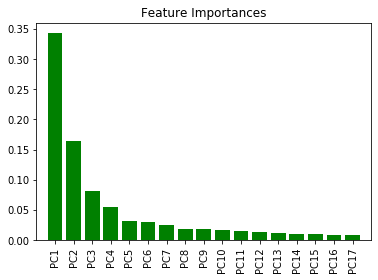

In [18]:
#plot
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),importances[indices],color="g",align="center")
plt.xticks(range(X_train.shape[1]),X_train,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\Corrleation_FLUXRFPCA.pdf')
plt.show()

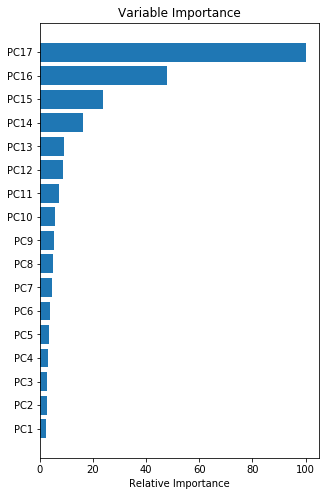

In [19]:
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = importances
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) 
plt.figure(figsize=(5, 8))
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\Correlation_FLUXRFPCA1.pdf')
plt.show()

In [20]:
X_train = X_train.merge(z1_train,left_index=True,right_index=True)
X_val = X_val.merge(z1_val,left_index=True,right_index=True)
X_test = X_test.merge(z1_test,left_index=True,right_index=True)

In [21]:
# Fitting Simple Linear Regression to the Training set
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

c:\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
# KFOlD
estimator = regressor
kfold = KFold(n_splits=5, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results.mean(), results.std())

-0.43889395000634523 0.4920785147113616


In [23]:
#Predicting the Validation set results
y_predval = regressor.predict(X_val)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_val, y_predval):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_predval[i] - y_val[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_val))
    return sqrt(mean_error)

rmse = rmse_metric(y_val, y_predval)

def meanactual_metric(y_val):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_val[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_val))
    return (mean_error)

mean = meanactual_metric(y_val)
rrmse = rmse/mean
print(rrmse)

21.5629797931885
802.4773590074374
28.328031329540664
0.9871761758490016


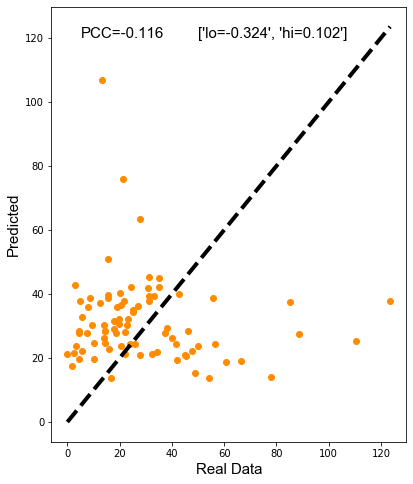

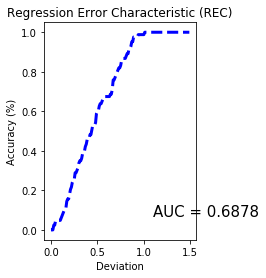

In [24]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_val , y_predval, alpha=0.05):
    PCC, p = stats.pearsonr(y_val , y_predval)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_val)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_val , y_predval, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(5, 120, PCC , fontname="Arial", fontsize=15)
plt.text(50, 120,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\VALIDATION_PCC_FLUXRFPCA.pdf')
plt.show()
#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\VALIDATION_AUC_FLUXRFPCA.pdf')
plt.show()


In [25]:
y_val

array([  1.91,   4.96,  27.66,  10.09,  37.29,  25.  ,  24.97,  15.67,
        20.57,  47.77,  31.21,  25.99,  14.45,  13.44,  55.85,  35.18,
         9.36,  32.46,  18.63,  41.56,  77.79,  42.74,  27.14,  60.68,
        15.64,  21.45,  15.41,  23.78,  13.86,   4.37,  31.27,  49.8 ,
        33.28,  54.3 ,  45.3 ,   2.86,  88.57, 123.49,   2.43,  14.26,
        17.74,  35.22,  30.81,  19.74,  85.25,  24.21,   8.54,  20.57,
        27.76,  18.99,  22.01,  66.59,   3.19,  31.11,  38.01,   4.63,
        49.01,  19.58,  15.8 ,  22.14,  17.77,  12.32,   7.36,  41.79,
        14.29, 110.41,  13.99,   0.  ,  16.85,  44.91,   5.68,  20.27,
         5.72,  34.17,  10.18,  56.67,  45.99,  22.9 ,  39.91,   4.3 ,
        23.16,  21.81,   7.98])

In [26]:
y_predval

array([ 17.57      ,  37.71791535,  20.96683071,  19.83      ,
        27.743     ,  34.434     ,  35.00991535,  51.026     ,
        23.77074606,  22.219     ,  39.433     ,  24.373     ,
        28.37983071, 106.952     ,  38.673     ,  44.834     ,
        30.256     ,  21.163     ,  27.823     ,  24.377     ,
        14.051     ,  40.13491535,  36.31      ,  18.744     ,
        38.656     ,  75.85791535,  39.73483071,  24.467     ,
        26.331     ,  28.358     ,  45.411     ,  23.848     ,
        39.407     ,  13.827     ,  20.64391535,  42.658     ,
        27.379     ,  37.867     ,  21.466     ,  24.54      ,
        31.714     ,  42.26      ,  41.745     ,  30.69091535,
        37.477     ,  42.302     ,  38.75891535,  36.634     ,
        63.51      ,  35.869     ,  27.968     ,  19.206     ,
        23.689     ,  37.758     ,  29.37791535,  19.632     ,
        15.438     ,  32.31991535,  22.737     ,  21.35983071,
        29.187     ,  37.16291535,  27.698     ,  19.51

In [ ]:
-------------------------------------------------Testing Set--------------------------------------------------------------------

In [27]:
y_pred = regressor.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_test, y_pred):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_pred[i] - y_test[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_test))
    return sqrt(mean_error)

rmse = rmse_metric(y_test, y_pred)

def meanactual_metric(y_test):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_test[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_test))
    return (mean_error)

mean = meanactual_metric(y_test)
rrmse = rmse/mean
print(rrmse)

25.395254580557243
1510.9805103125095
38.871332757091174
1.21330427915416


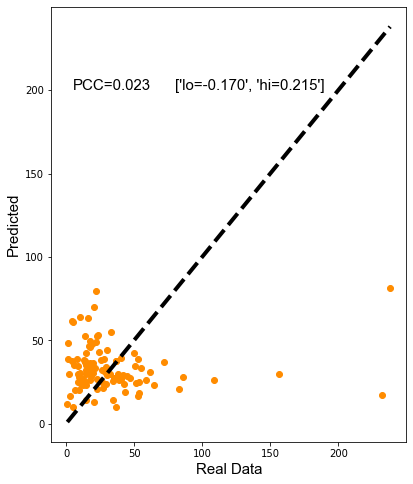

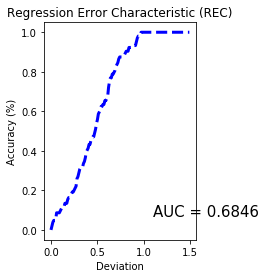

In [28]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_test , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_test)):
            if np.linalg.norm(y_test[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_test[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_test))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_test, y_pred)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_test , y_pred, alpha=0.05):
    PCC, p = stats.pearsonr(y_test , y_pred)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_test)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_test , y_pred, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.text(5, 200, PCC , fontname="Arial", fontsize=15)
plt.text(80, 200,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\TESTING_PCC_FLUXRFPCA.pdf')
plt.show()
#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\RF\FLUX\TESTING_AUC_FLUXRFPCA.pdf')

plt.show()

In [29]:
y_test

array([  5.06      ,  27.27      ,  19.48      ,  17.71      ,
        15.24      ,   2.99      ,  38.7       ,  58.41      ,
         4.07      ,  28.55      ,  20.17      ,  51.22      ,
        35.45      ,  40.37      ,  34.36      ,  18.3       ,
        72.24      ,   5.49      ,  14.03      ,  14.29      ,
         8.67      ,  36.63      ,  12.22      ,  32.06      ,
        14.59      ,  23.06      ,  44.58      ,  24.34      ,
         9.23      ,  21.98      ,  14.72      ,  16.52      ,
        53.29      ,   5.29      ,   4.57      ,  17.61      ,
        14.26      ,  36.76      ,  13.67      ,  18.56      ,
        19.81      ,   8.8       ,  52.56      ,  55.29      ,
        26.28      ,  13.93      ,  17.44      , 156.54      ,
        34.26      ,   8.48      ,  32.69      ,  29.79915354,
         8.21      ,  29.79915354,  38.47      ,  50.03      ,
        16.43      ,  18.99      , 238.11      ,  29.17      ,
         9.43      ,  53.12      ,  29.43      ,  15.7 

In [30]:
y_pred

array([60.77      , 21.347     , 33.49691535, 36.632     , 31.831     ,
       16.616     , 25.897     , 26.196     , 37.468     , 30.743     ,
       12.87191535, 24.139     , 27.534     , 26.879     , 25.68      ,
       33.887     , 36.805     , 35.07791535, 24.833     , 29.45191535,
       34.767     , 10.217     , 26.473     , 29.798     , 23.1       ,
       26.551     , 28.693     , 43.154     , 20.139     , 79.42      ,
       42.395     , 46.806     , 24.90891535, 10.224     , 61.70991535,
       46.04991535, 13.873     , 37.31983071, 37.50291535, 28.752     ,
       36.637     , 29.807     , 16.311     , 33.12      , 32.317     ,
       52.334     , 49.666     , 29.686     , 14.265     , 24.774     ,
       54.821     , 44.407     , 38.787     , 29.433     , 29.584     ,
       42.524     , 63.06      , 47.60291535, 81.425     , 23.62991535,
       27.96383071, 39.019     , 34.22083071, 30.359     , 26.04191535,
       35.25791535, 18.636     , 48.514     , 52.653     , 28.15